# Data Cleaning

In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import LOCATION

### Loading dataframe from csv files

<div class="alert alert-block alert-success">
<b>Our data (source code) is present in several (80) csv files.
    
The below code copies all the csv files and loads it to a pandas dataframe
</div>

In [2]:
# specifying the path to csv files
path = LOCATION
# print(path)  

# csv files in the path
files = glob.glob(path + "*.csv")
  
# defining an empty list to store content
data_frame = pd.DataFrame()
content = []
  
# checking all the csv files in the specified path
for filename in files:
#     print(filename)
    # reading content of csv file
    if filename.find('data/data')!= -1:
        df = pd.read_csv(filename, index_col=None)
        content.append(df)
  
# converting content to data frame
data_frame = pd.concat(content)

# to reset index from 0-3191
data_frame = data_frame.reset_index()
data_frame

# replacing column name reliability, with reliability
data_frame.rename(columns={'reliability,': 'reliability'}, inplace=True)

data_frame.head()

,index,content,location,date,satisfaction,customer_service,speed,reliability
0,0,Awful service awful internet speed and reliab...,Manchester~~~,2017-07-06~~~,1,1,1,1
1,1,Poor customer service. Had to speak to 7 peopl...,Norbury~~~,2017-07-06~~~,2,2,3,3
2,2,Dreadful in every aspect. It simply does not w...,Tenbury Wells~~~,2017-07-05~~~,1,1,1,1
3,3,SHOCKING service. Placed order got told it wi...,Morpeth~~~,2017-07-04~~~,1,1,1,1
4,4,Very unhappy with connection quality and custo...,Norfolk~~~,2017-07-04~~~,1,1,1,1


In [3]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             3192 non-null   int64 
 1   content           3192 non-null   object
 2   location          3192 non-null   object
 3   date              3192 non-null   object
 4   satisfaction      3192 non-null   object
 5   customer_service  3192 non-null   object
 6   speed             3192 non-null   object
 7   reliability       3192 non-null   object
dtypes: int64(1), object(7)
memory usage: 199.6+ KB


### Cleaning data by removing tilda's and replacing empty strings with NaN

<div class="alert alert-block alert-info">
It can be observed that there are tilda '~' characters present in the dataframe. 

This is replaced with empty string and if the column contains only empty string, then it is replaced with NaN
</div>

In [4]:
# to replace '~~~' with empty string ''
def replace_tilda(df):
    df = df.replace('~~~', '', regex=True)
    return df


# to replace empty strings with Nan
def replace_empty_strings_Nan(df):
    df = df.replace(r'^\s*$', np.NaN, regex=True)
    return df


data_frame = replace_tilda(data_frame)
data_frame = replace_empty_strings_Nan(data_frame)

### Checking for duplicate rows in the dataframe

In [5]:
data_frame[data_frame.duplicated()]

,index,content,location,date,satisfaction,customer_service,speed,reliability


<div class="alert alert-block alert-info">
There are no duplicate rows observed in our dataframe
</div>

### Checking for null values in the dataframe

In [6]:
data_frame.isnull().sum()

index                 0
content               3
location             58
date                  0
satisfaction        360
customer_service    396
speed               419
reliability         431
dtype: int64

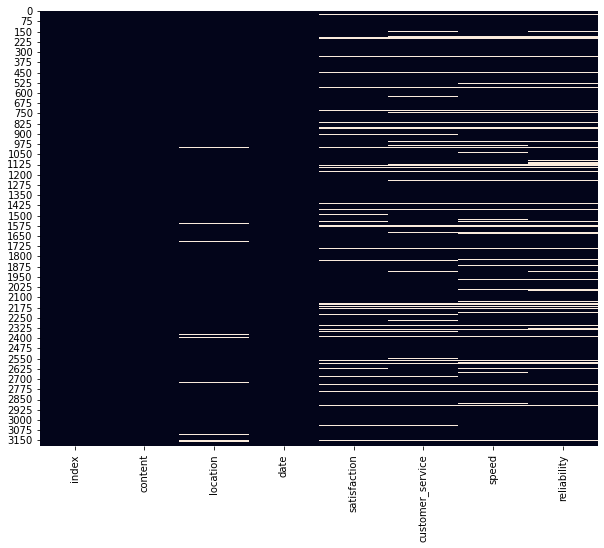

In [7]:
# visualizing the missing data/null values through heat map
plt.figure(figsize=(10,8))
sns.heatmap(data_frame.isnull(), cbar=False)
plt.show()

In [8]:
# data_frame.drop(labels='index', axis=1, inplace=True)
data_frame

,index,content,location,date,satisfaction,customer_service,speed,reliability
0,0,Awful service awful internet speed and reliab...,Manchester,2017-07-06,1,1,1,1
1,1,Poor customer service. Had to speak to 7 peopl...,Norbury,2017-07-06,2,2,3,3
2,2,Dreadful in every aspect. It simply does not w...,Tenbury Wells,2017-07-05,1,1,1,1
3,3,SHOCKING service. Placed order got told it wi...,Morpeth,2017-07-04,1,1,1,1
4,4,Very unhappy with connection quality and custo...,Norfolk,2017-07-04,1,1,1,1
...,...,...,...,...,...,...,...,...
3187,35,Just a warning about BT Infinity the BT Hub b...,Wales,2017-08-26,1,1,3,1
3188,36,I have had a contract with BT for telephone b...,Wimbledon,2017-08-26,1,1,1,1
3189,37,Little satisfaction from BT sales/help; poor s...,Norton Bavant,2017-08-26,1,1,1,2
3190,38,Just don't do it. New build took 11 weeks for...,Milton Keynes,2017-08-25,1,1,5,3


In [9]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             3192 non-null   int64 
 1   content           3189 non-null   object
 2   location          3134 non-null   object
 3   date              3192 non-null   object
 4   satisfaction      2832 non-null   object
 5   customer_service  2796 non-null   object
 6   speed             2773 non-null   object
 7   reliability       2761 non-null   object
dtypes: int64(1), object(7)
memory usage: 199.6+ KB


## Saving this dataframe to a csv_file

In [10]:
loc_to_save = LOCATION + 'bt_data.csv'
data_frame.to_csv(loc_to_save)